#  Laboratorio #2: Regresión logística

# Regresión logística Binaria

## Función de activación sigmoidal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
La función sigmoidal nos permite expresar el valor de z entre 0 y 1 usando el
simil de una probabilidad condicional.
En este caso z sería la ecuación de la regresión W*X + b
'''
def sigmoid(z):
  '''
  z = w*X + b
  w: es el vector de pesos o de coeficientes
  x: vector de features
  b: El interceto, también conocido como bias
  '''
  sgm = 1.0 / (1.0 + np.exp(-z))
  return sgm



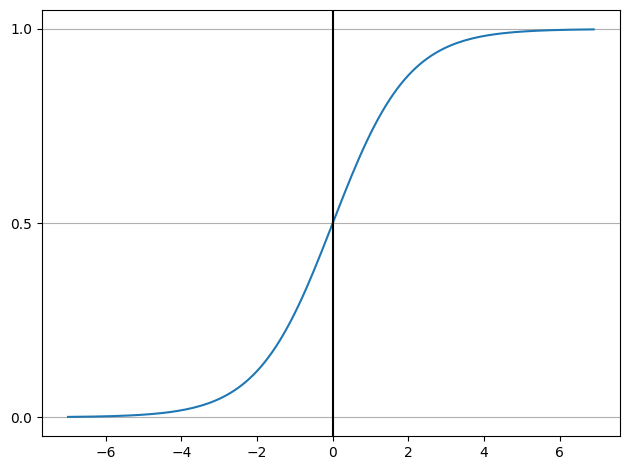

In [3]:
#grafica de la función sigmoidal
z = np.arange(-7, 7, 0.1)
sigmoidal_z = sigmoid(z)

plt.plot(z, sigmoidal_z)
plt.yticks([0.0, 0.5, 1.0])
plt.axvline(0.0, color='k')
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
plt.show()

## Función de perdida (Cross-entropy loss)

In [4]:
'''
La función de perdida (loss) nos permite estimar la distancia que hay entre los valores
reales de la variable dependiente (y) y los valores predichos(y^). Nuestro
principal objetivo es desplazar los valores de w(coeficientes o pesos) y b(intercepto o
bias) para ir minimizando iterativamente la distancia entre la variable dependiente y los valores
predichos.

Esta función para regresión logística es convexa, es decir, solo tienen un mínimo
'''

def loss_function(y_real, y_pred):
  '''
  y_real: los valores reales obtenidos en el dataset
  y_pred: los valores que se encontraron a partir de la función sigmoide

  '''
  cross_entropy_loss = -(y_real*np.log(y_pred) + (1-y_real)*np.log(1-y_pred))

  return cross_entropy_loss

## Gradiente descendiente

In [5]:
'''
Una vez encontrada la perdida con la función de coste necesitamos un algoritmo
de optimización para actualizar los valores de w y b y minimizar la perdida, para
esto usamos el gradiente descendiente. El gradiente de una función de varias
variables es un vector que apunta en dirección del mayor incremento en una función.
El gradiente descendiente encuentra el gradiente de la función de perdida en el punto
actual y se mueve en la dirección opuesta

Importante: Tener cuidado con las dimensiones de las matrices a multiplicar,
recordar que las columnas de la primera matriz deben ser iguales a las filas de la segunda
matriz y el resultado será una matriz con el número de filas de la primera matriz y el
número de columnas de la segunda
'''
def gradiente(y_real, y_pred, X):
  n_muestras = X.shape[0]

  derivada_parcial_gradiente_w =(1.0/n_muestras)/np.dot(X.T, (y_pred - y_real))

  derivada_parcial_gradiente_b = (1.0/n_muestras)*np.sum((y_pred - y_real))

  return derivada_parcial_gradiente_w, derivada_parcial_gradiente_b


## Juntando todo

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split

In [7]:
'''
En la práctica no se calcula gradiente por gradiente, sino que se utilizan
batchs, los batchs son subconjuntos de los datos de m número de muestras.

Epochs o epocas es el numero de iteraciones que se realizan sobre el dataset.

Leraning rate o taza de aprendizaje hace referencia al paso con el que se actualizan
los pesos y el bias, por lo general va de 0 a 1 y se cambia con potencias de 10
'''

def train(X, y, batch_size, epochs, learning_rate):

  n_muestras, n_features = X.shape

  #1. Inicializar los pesos, en este caso los inicializamos en cero al igual que el bias
  w = np.zeros((n_features, 1))
  b = 0

  #2. Reshape de la entrada, para ajustarla y multiplicarla despues
  y = y.reshape(n_muestras,1)


  #3. perdidas
  losses = []

  #4. Comenzamos la iteracion
  for epoch in range(epochs):
    for i in range((n_muestras-1)//batch_size + 1): #Para que el batch no abarque mas allá del número de datos y genere un error

      #Definimos el conjunto de datos donde se realizara el calculo por el batch
      inicio = i*batch_size
      fin = inicio+batch_size

      x_batch = X[inicio:fin]
      y_batch = y[inicio:fin]

      #Calculamos la función sigmoide sobre el batch
      y_pred = sigmoid(y_batch)

      #Calculamos la función de loss sobre el batch
      loss = loss_function(y_real=y_batch, y_pred=y_pred)
      losses.append(loss)

      #Calculamos los gradientes
      grad_w, grad_b = gradiente(y_real=y_batch, y_pred=y_pred, X=x_batch)

      #actualizamos los pesos con el learnning rate
      w -= learning_rate*grad_w
      b -= learning_rate*grad_b

  return w, b, losses

In [8]:
def predict(X, w, b):
  '''
  X: Matriz con las diferentes muestras a clasificar
  w: el vector de pesos resultante del entrenamiento
  b: el valor de bias resultante del entrenamiento
  '''

  # calculamos las predicciones con los pesos y el bias encontrado usando la
  # función sigmoide
  y_pred = sigmoid(np.dot(X, w) + b)

  #
  pred_class = []

  #definimos el umbral, para este caso los valores mayores a 0.5 se clasifican
  # en la clase 1 y los menores o iguales se clasifican en la clase 0
  for pred in y_pred:
    if pred > 0.5:
      pred_class.append(1)
    else:
      pred_class.append(0)

  return np.array(pred_class)

In [9]:
'''
Función simple para observar el comportamiento del modelo, siemplemente
contamos las predicciones correctas y las dividimos sobre el número de muestras
'''
def accuracy(y_real, y_pred):
    accuracy = np.sum(y_real == y_pred) / len(y_real)
    return accuracy

##Prueba con dataset iris
Objetivo:Clasificar la especie de planta de acuerdo a las caracteristicas de
sus pétalos y sépalos.

descripción del dataset:
* sepal_length: longitud del sépalo de la flor
* sepal_width: anchura del sépalo de la flor
* petal_length: longitud del petalo de la flor
* petal_width: anchura del petalo de la flor
* species: Especie a la que pertence la flor

In [10]:
df = sns.load_dataset('iris')

In [11]:
#Como nuestro expermiento por ahora solo funciona para clasificación binaria
# eliminamos una de las clases
new_df = df.loc[df['species'] != 'setosa']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [12]:
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

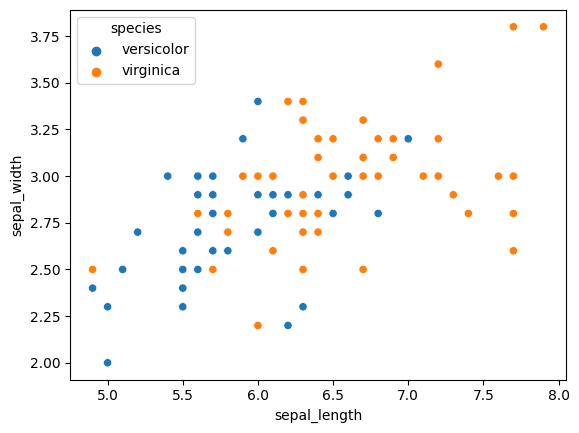

In [13]:
#Se puede obersrvar que la diferencia entre las dos clases es complicada
sns.scatterplot(x='sepal_length', y='sepal_width', data=new_df, hue='species')

In [14]:
#separamos las variables independientes de la dependiente(target)
X = new_df.drop('species', inplace=False, axis=1)

y = new_df['species']

In [15]:
# codificamos la variable independiente con label encoder para manejar números
# en lugar de variables categoricas númericas
le = LabelEncoder()
y = le.fit_transform(y)


In [16]:
#Creamos los conjuntos de prueba y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [17]:
x_columns_names = X.columns

In [18]:
#Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

In [19]:
X_train = pd.DataFrame(data=X_train, columns=x_columns_names)
X_test = pd.DataFrame(data=X_test, columns=x_columns_names)

In [20]:
#Obtenemos el vector de pesos, el bias y las periddas
w, b, losses = train(X_train, y_train, 3, 20, 0.01)

In [21]:
#predecimos los datos sobre el entrenamiento
y_pred = predict(X_train, w, b)

In [22]:
#vemos como se comporto el modelo
print(f'Accuracy para entrenamiento: {accuracy(y_train, y_pred)}')

Accuracy para entrenamiento: 0.825


In [23]:
#predecimos los datos sobre el test
y_pred_test = predict(X_test, w, b)

In [24]:
print(f'Accuracy para prueba: {accuracy(y_test, y_pred_test)}')

Accuracy para prueba: 0.6


In [25]:
#Experimentar variando el numero de epocas, el tamaño del batch y el learning_rate

#Que se tiene que modificar para que sea realmente estocastico?

# Regresión Logistica usnado Sklearn

Documentación:
* LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* SGDClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Retomemos el ejercicio del laboratorio dirigido I.

In [26]:
## Si la ejecución de la importación les genera error reinicien el entorno de ejecución
## e inicie desde esta celda
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
import re
import pandas as pd

In [27]:
stemmer = nltk.stem.SnowballStemmer('spanish') # Vamos a utlizar el Snowball Stemmer para realizar stemming (nos permite llevar las palabras a una forma estandar).
nltk.download('stopwords') # Lista de palabras de parada en español.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
df = pd.read_csv('Tutorial-NLP_Analisis_de_Sentimientos.csv', sep=',', header=0, index_col= None, engine='python',
                 usecols=['film_name','gender','review_title','review_text','polaridad'])

In [29]:
df['texto'] = df['review_title'] + ' ' + df['review_text']
def processing_text(texto):
    # Paso 1: Remover con un expresión regular carateres especiales (no palabras).
    processed_feature = re.sub(r'\W', ' ', str(texto))
    # Paso 2: Remover ocurrencias de caracteres individuales
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
    # Paso 4: Simplificar espacios concecutivos a un único espacio entre palabras
    processed_feature = re.sub(' +', ' ', processed_feature)
    # Paso 5: Pasar todo el texto a minúsculas
    processed_feature = processed_feature.lower()
    # Paso 6: Aplicar stemming. Es una forma de enviar las palabras a una raiz común simplificando de esta manera el vocabulario.
    #         por ejemplo las palabras (absurdo, absurdos) que estan en el review 2895 seran llevados a la raiz común "absurd"
    #         y de esta forma se evita tener dos palabras diferentes con el mismo significado en nuestro vocabulario.
    processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])


    return processed_feature

In [30]:
texto_para_procesar = df['texto'].values
labels = df['polaridad'].values

# El texto ya procesado de cada ejemplo en nuestro dataset lo almacenaremos en la variable "texto_procesado"
texto_procesado = []
for sentence in range(0, len(texto_para_procesar)):
    procesado = processing_text(texto_para_procesar[sentence])
    texto_procesado.append(procesado)

In [31]:
print("Sin procesar:")
print(texto_para_procesar[2895])
print("---------------------------------")
print("Procesado:")
print(texto_procesado[2895])

Sin procesar:
No pude acabar de verla Me aburrí.  No le vi la gracia a Ocho Apellidos Vascos, mucho menos se la voy a ver a este desgraciado efecto secundario.  El caso es que empecé a verla con ganas, a ver si por lo menos me reía de algún chiste, pero, o no los distinguí, o no existen en el texto o ando espesito yo.  El guión es un absurdo sin gracia, porque hay absurdos graciosos, pero no este, y si no hay guión no hay peli por mucho que tengamos a Karra y a la Sardá.  Me los imagino a los dos compartiendo unas kokotxas con xamfaina y haciéndose confidencias acerca de lo que tiene que hacer uno para que le quede una pensión decente.En realidad esta es la crítica de las tres cuartas partes de la película, el final me cogió haciéndome el colacao para irme a la cama.
---------------------------------
Procesado:
no pud acab de verl me aburr no le vi la graci ocho apell vasc much men se la voy ver este desgraci efect secundari el cas es que empec verl con gan ver si por lo men me rei de 

In [32]:
# Bolsa de palabras
vectorizer = CountVectorizer(max_features=2500, stop_words=stopwords.words('spanish'))
# max_features representa el tamaño del vocabulario. Vamos a permitir 2500 palabras.
# stop_words le indicamos las palabras de parada para que las ignore en el vocabulario.

# Ahora le solicitamos utilizando nuestro conjunto de datos que construya el vocabulario y tambien transforme nuestro texto
texto_features = vectorizer.fit_transform(texto_procesado).toarray()

In [33]:
vectorizer.get_feature_names_out()[0:10]

array(['abaj', 'abandon', 'abarc', 'aberr', 'abiert', 'abord', 'abre',
       'absolut', 'absurd', 'abuel'], dtype=object)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(texto_features, labels, test_size=0.2, random_state=0)

## Entrenamiento del modelo

In [35]:
'''
Vamos a probar los dos algoritmos de regresión logistica que tiene sklearn:
LogisticRegression y SGDClassifier

'''
from sklearn.linear_model import LogisticRegression, SGDClassifier

### SGDClassifier

In [36]:
logistic_model_SGD = SGDClassifier(loss='log_loss',learning_rate='constant',eta0=0.1 ) # investicar los parámetros en la documentacion y variar el learning_rate
logistic_model_SGD.fit(X_train, y_train)


SGDClassifier(eta0=0.1, learning_rate='constant', loss='log_loss')

In [37]:

print(f'Clases de la variable dependiente: {logistic_model_SGD.classes_}')
print('\n')
print('Vectores de coeficientes:')
print(logistic_model_SGD.coef_)


Clases de la variable dependiente: ['negativo' 'positivo']


Vectores de coeficientes:
[[ 0.57152111  0.06503446  0.2060633  ... -0.51677386 -0.70891166
  -0.01902453]]


In [38]:
y_pred = logistic_model_SGD.predict(X_train)

Accuracy entrenamiento: 1.0
Matriz de confusión:


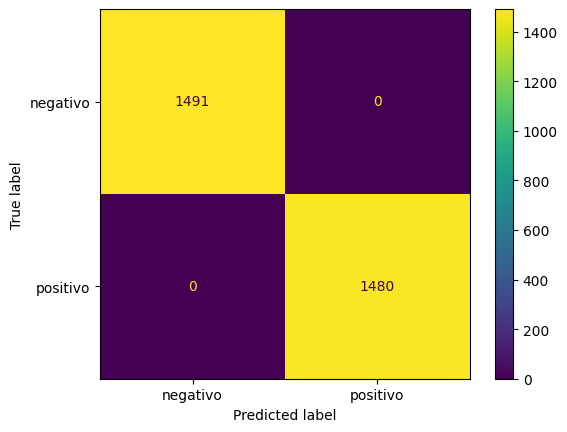

In [39]:
print(f'Accuracy entrenamiento: {accuracy_score(y_train, y_pred)}')
print('Matriz de confusión:')
matriz_confusion = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=logistic_model_SGD.classes_)
disp.plot()
plt.show()

In [40]:
y_pred_test = logistic_model_SGD.predict(X_test)

Accuracy testing: 0.8613728129205922
Matriz de confusión:


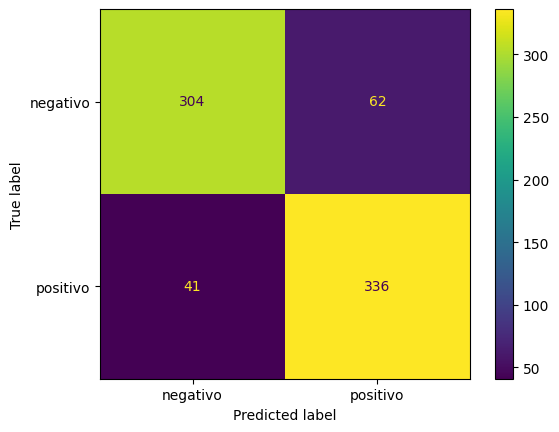

In [41]:
print(f'Accuracy testing: {accuracy_score(y_test, y_pred_test)}')
print('Matriz de confusión:')
matriz_confusion_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test, display_labels=logistic_model_SGD.classes_)
disp.plot()
plt.show()

### LogisticRegression

In [42]:
## El modelo de LogisticRegression en sklearn no ultiliza SGD!
## Utiliza otro método denominado SAG solver (Stochastic Average Gradient)

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

C:\Users\pms_l\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
print(f'Clases de la variable dependiente: {logistic_model.classes_}')
print('\n')
print('Vectores de coeficientes:')
print(logistic_model.coef_)

Clases de la variable dependiente: ['negativo' 'positivo']


Vectores de coeficientes:
[[ 0.27114516  0.09377319  0.09841478 ... -0.32212206 -0.29271145
   0.02276942]]


In [44]:
y_pred_2 = logistic_model.predict(X_train)

Accuracy entrenamiento: 0.998653651969034
Matriz de confusión:


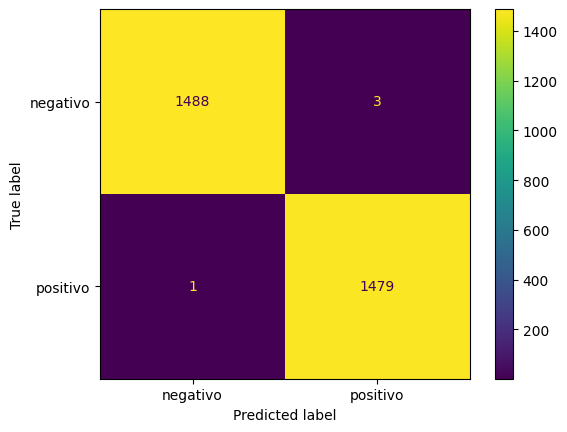

In [45]:
print(f'Accuracy entrenamiento: {accuracy_score(y_train, y_pred_2)}')
print('Matriz de confusión:')
matriz_confusion_2 = confusion_matrix(y_train, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_2, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

In [46]:
y_pred_test_2 = logistic_model.predict(X_test)

Accuracy testing: 0.8748317631224765
Matriz de confusión:


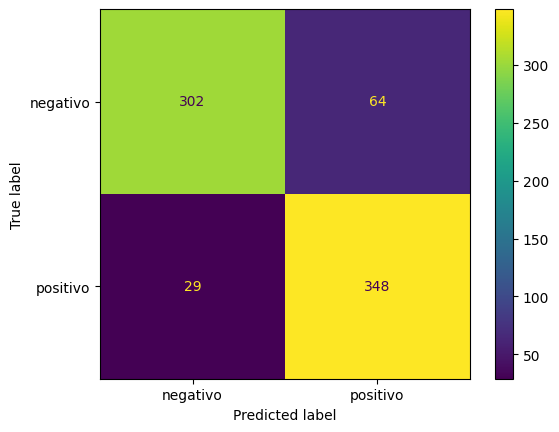

In [47]:
print(f'Accuracy testing: {accuracy_score(y_test, y_pred_test_2)}')
print('Matriz de confusión:')
matriz_confusion_test_2 = confusion_matrix(y_test, y_pred_test_2)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test_2, display_labels=logistic_model.classes_)
disp.plot()
plt.show()